In [72]:
import numpy as np
import pandas as pd


In [73]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

In [74]:
# X_df = pd.read_json('mydata-mitbih-small.json')
X = np.load('mit-bih-arr-eq.npy')

In [75]:
X_data = X[np.random.permutation(X.shape[0]),...]#np.array(X_df.sample(frac=1))
Y_data = X_data[:,-1]
X_data = X_data[:,:-1]

# Y_data_ = Y_data > 0.
# Y_data = 2.*(Y_data > 0.) - 1


In [76]:
print('X.shape = ',X_data.shape)

print('Y.shape = ',Y_data.shape)

X.shape =  (5000, 2000)
Y.shape =  (5000,)


In [77]:
n0 = 1000

N = 5000

In [78]:
# Xn_ = X_data  # Define input data
# Yn_ = np.array((Y_data+ 1 )/ 2  ,dtype=int)                      # Defile label data
# svc = rfflearn.rfflearn_cpu_gp.GPC("rff").fit(Xn_, Yn_)                   # Training (on CPU)
# print('Score: ',svc.score(Xn_, Yn_))                                     # Inference (on CPU)

# ran_int = np.random.randint(N-n0)
# print(ran_int)
# print('class: ',( Y_data_[n0+ran_int]+1)/2)
# prediction = svc.predict(X_data[n0+ran_int][None,:])

# print('pred', prediction.max())
# treshold= 10
# prediction = svc.predict(X_data[n0+ran_int][None,:])
# class_prediction = 1 * (prediction.sum() >= treshold)
# print( 1*(class_prediction==Y_data_[n0+ran_int]))
# # plot_stuff(X_data[n0+ran_int,:],prediction)
# prediction


In [79]:
np.unique(Y_data)

array([0., 1., 2., 3., 4.])

## GPs

In [80]:
d1 = 1
d2 = 20
d = d1 * d2
m = 500 #1_000

subsample = 3

n0 = 100

N = 1000

SIGMA2 = .1
# COEF_LAMBDA = 0.1
# LAMBDA = COEF_LAMBDA * np.identity(d)

In [81]:
def make_X(X_data,
           d2,
           m,
           N,
           subsample=1):
    
    X = np.zeros((N,m,d1,d2))
    dim1, dim2 = X_data.shape
    mid = dim2 // 2
    
    assert(mid - m > d2)
    for i_d in range(d2):
        X[:,:,0,i_d] = np.roll(X_data[:N,(mid - m //2 ) :(mid + m //2)], -i_d, axis=-1)
    plt.plot( X[0,:,0, 0])
    return X.reshape((N,m,d))



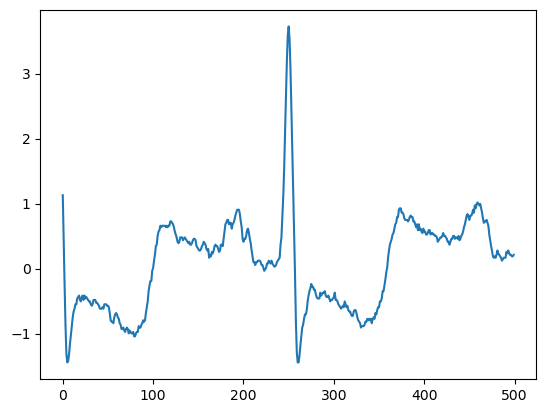

In [82]:
X = make_X(X_data,d2=d2,m=m,N=N)
Y = Y_data[:N]

In [83]:
#@params
SIGMAf2 = 1
LAMBDAf2 = 1

In [84]:
Xn = X[:n0]
Yn = Y[:n0]

In [85]:
Xn_ = Xn.reshape((n0*m,d))
Yn_ = Yn.repeat(m)

In [86]:
def plot_stuff(signal,prediction):
    # Example data: a simple time series
    time = np.arange(len(signal))
    
    # signal += np.random.normal(0, 0.5, 500)  # Adding some noise

    # Create a colormap
    norm = Normalize(0,1)
    cmap = plt.get_cmap('bwr')

    # Create a collection of line segments
    points = np.array([time, signal]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(prediction)
    lc.set_linewidth(2)

    # Plot the original signal with changing colors
    fig, ax = plt.subplots(figsize=(12, 6))
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax, label='Time')

    ax.set_xlim(time.min(), time.max())
    ax.set_ylim(signal.min(), signal.max())
    ax.set_title('Original Signal with Changing Colors')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

    plt.show()

## Spectral methods but better

In [87]:
# import rfflearn

In [88]:
import rfflearn.cpu as rfflearn


In [89]:
X[n0+1].flatten().shape

(10000,)

In [90]:
Xn_[0].shape

(20,)

In [91]:
X.shape
Y.shape

(1000,)

In [92]:
X[n0+1,0].shape

(20,)

Score:  0.70978
868
class:  0.5
pred 1
0


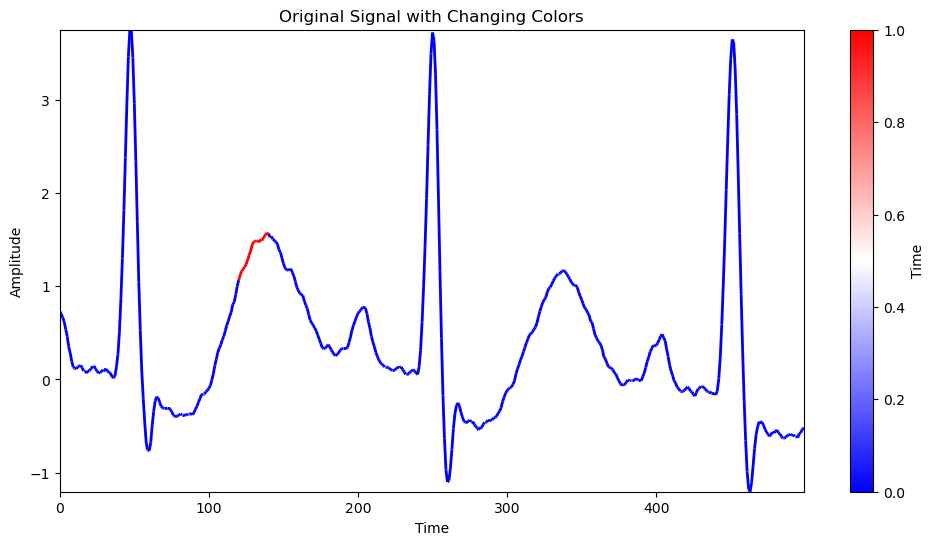

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
Xn_ = Xn_  # Define input data
Yn_ = np.array((Yn_+ 1 )/ 2  ,dtype=int)                      # Defile label data
svc = rfflearn.rfflearn_cpu_gp.GPC("rff").fit(Xn_, Yn_)                   # Training (on CPU)
print('Score: ',svc.score(Xn_, Yn_))                                     # Inference (on CPU)

ran_int = np.random.randint(N-n0)
print(ran_int)
print('class: ',( Y[n0+ran_int]+1)/2)
prediction = svc.predict(X[n0+ran_int])

print('pred', prediction.max())
treshold= 10
prediction = svc.predict(X[n0+ran_int])
class_prediction = 1 * (prediction.sum() >= treshold)
print( 1*(class_prediction==Y[n0+ran_int]))
plot_stuff(X[n0+ran_int,:,0],prediction)
prediction


In [94]:
def evaluation(X,Y,treshold = 5):
    acc = 0
    for i in range(X.shape[0]):
        prediction = svc.predict(X[i])
        class_prediction = 1 * (prediction[200:300].sum() >= treshold)
        acc += 1*(class_prediction==Y[i])
    return acc / X.shape[0]
evaluation(X[n0+1:],Y[n0+1:],250)

0.7552836484983315

In [95]:
X.shape

(1000, 500, 20)

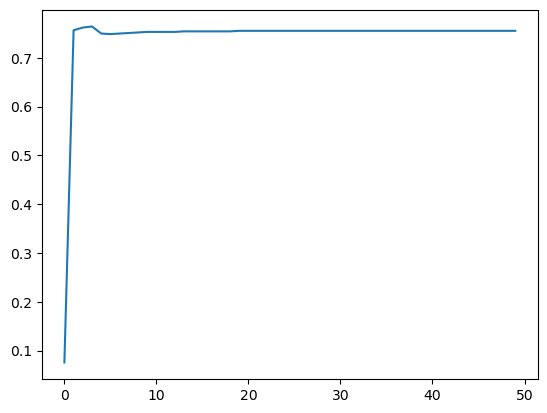

In [96]:
plt.plot([evaluation(X[n0+1:],Y[n0+1:],tresh) for tresh in range(0,X.shape[1],10)])

In [97]:
%%script false --no-raise-error
blue_red = np.array( ['b','r'])
colors = [blue_red[y_pred] for y_pred in prediction] #blue_red[np.array( prediction,dtype=int)].squeeze()
plt.scatter(range(len(X[n0+ran_int,:,0])),X[n0+ran_int,:,0],color =colors)

Couldn't find program: 'false'


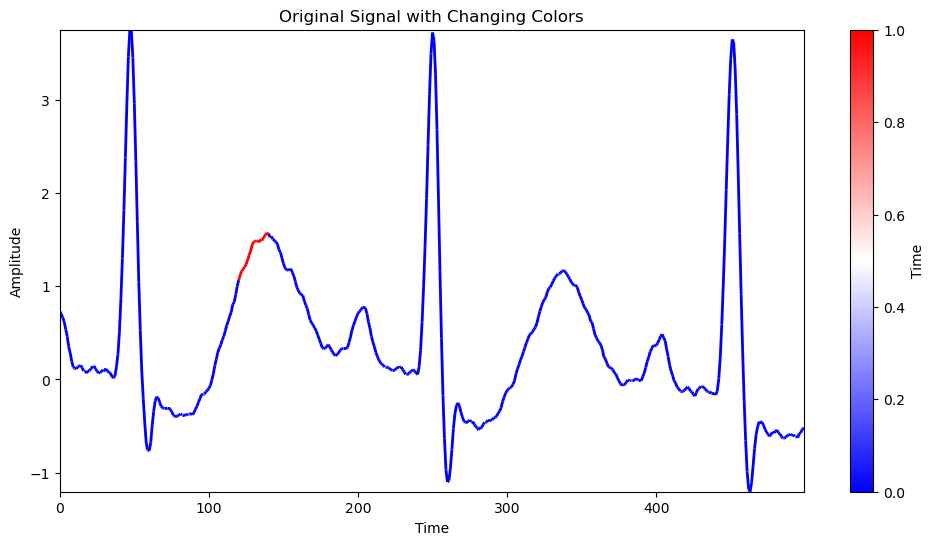

In [98]:


# Example data: a simple time series
time = np.arange(len(X[n0+ran_int,:,0]))
signal = X[n0+ran_int,:,0]
# signal += np.random.normal(0, 0.5, 500)  # Adding some noise

# Create a colormap
norm = Normalize(0,1)
cmap = plt.get_cmap('bwr')

# Create a collection of line segments
points = np.array([time, signal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(prediction)
lc.set_linewidth(2)

# Plot the original signal with changing colors
fig, ax = plt.subplots(figsize=(12, 6))
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label='Time')

ax.set_xlim(time.min(), time.max())
ax.set_ylim(signal.min(), signal.max())
ax.set_title('Original Signal with Changing Colors')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

plt.show()


## Spectral methods

In [99]:
from src.smk.models import SMKernelGP
import torch

In [100]:
XX = torch.FloatTensor(Xn_)
YY = torch.FloatTensor(Yn_)

In [101]:
XX.shape

torch.Size([50000, 20])

In [102]:
YY.shape

torch.Size([50000])

In [103]:
smkernelgp = SMKernelGP(XX,YY,n_dim = 20)

In [104]:
# smkernelgp.predict(XX[0].unsqueeze(0))

## à la main

In [105]:
def variance_matrix(x1, x2, sigma2=SIGMAf2, lambda2=LAMBDAf2):
    diff_x = np.array(x1[:,None,:] - x2[None,...],dtype = np.float16)
    L2 = (diff_x**2).sum(axis=-1).squeeze()
    return sigma2 * np.exp(- lambda2 * L2 / 2.)

In [106]:
K = variance_matrix(Xn_,Xn_)


MemoryError: Unable to allocate 373. GiB for an array with shape (50000, 50000, 20) and data type float64

In [ ]:
P = Yn_
K_1P =np.linalg.inv(K + SIGMA2*np.identity(K.shape[0]))@P

In [ ]:
def plot_mu_for_tau_index(tau_index):
    print('CLASS : ', Y[tau_index])
    tau = X[tau_index].reshape(m,d)
    
    kTtau = variance_matrix(Xn_.reshape(n0*m,d),tau)
    ktautau =  variance_matrix(tau,tau)
    P = Yn_
    
    # print(ktautau)
    # (K + SIGMA2*np.identity(K.shape[0])).shape
    mu = kTtau.T @ K_1P
    sigma = ktautau - kTtau.T @ (K + SIGMA2*np.identity(K.shape[0]) ) @ kTtau
    print( np.linalg.det(sigma))
    plt.plot(mu)
    plt.plot( np.ones_like(mu))
    plt.plot( - np.ones_like(mu))
    plt.ylim( (-2, +2) )
    plt.show()

In [ ]:
plt.plot()

CLASS :  -1.0
17246152290.695824


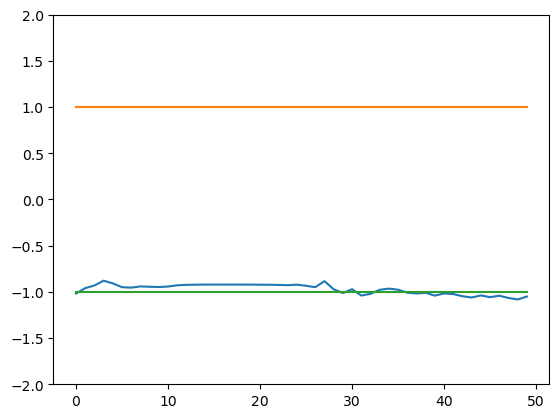

In [ ]:
plot_mu_for_tau_index(0)

CLASS :  -1.0
3.5361023861090716e+24


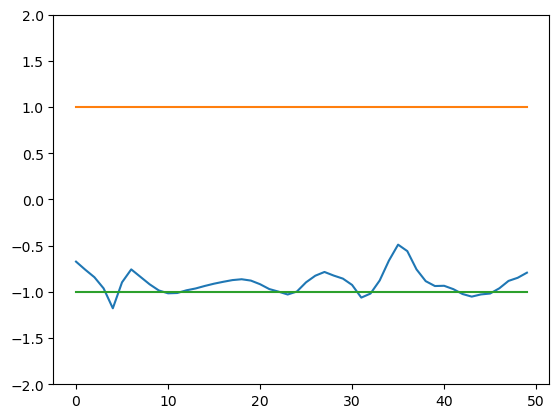

CLASS :  1.0
539140.8096883032


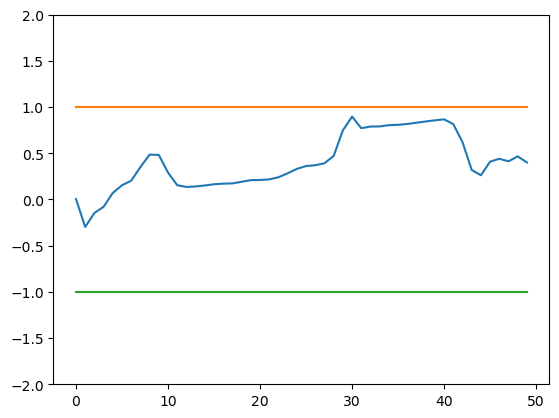

CLASS :  -1.0
9.831804310665873e-10


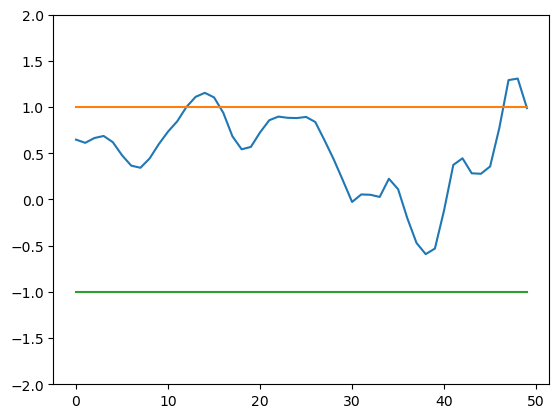

CLASS :  -1.0
-5.0188540099143374e+22


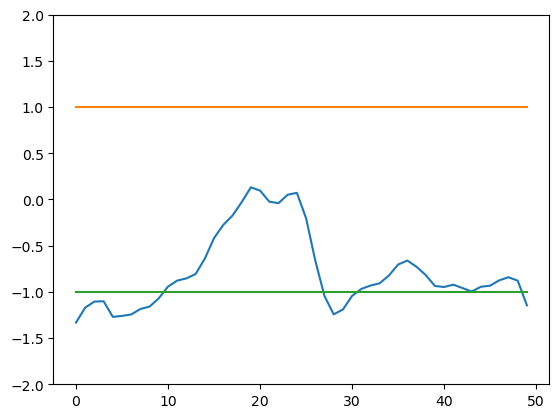

CLASS :  -1.0
-576.5374125007498


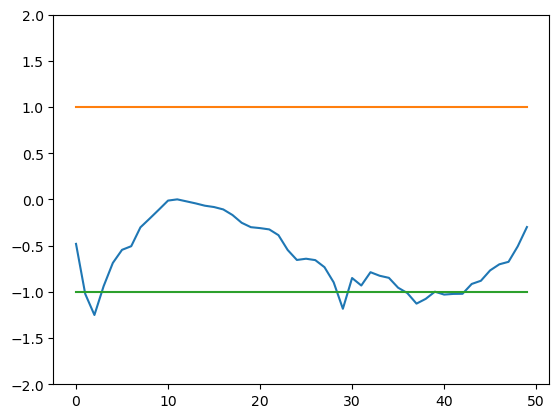

CLASS :  -1.0
-1.2572875077377557e+17


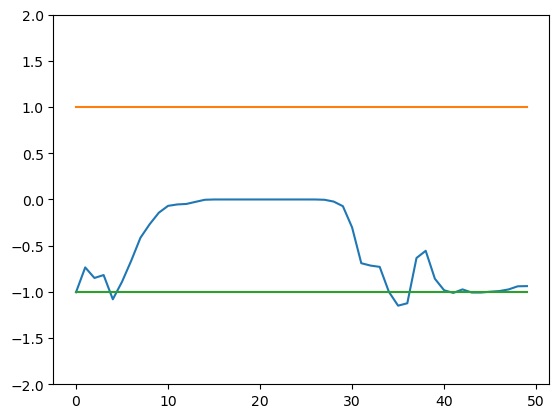

CLASS :  1.0
-1.2844860398542422e+25


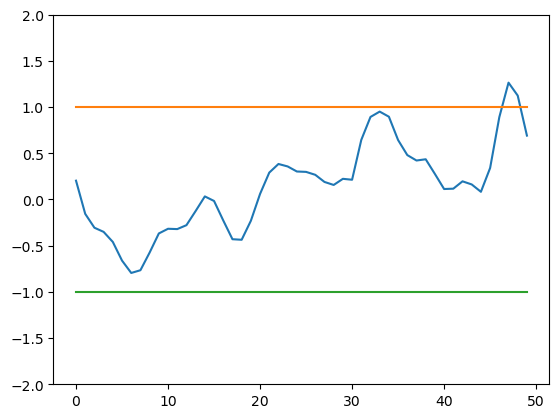

CLASS :  1.0
2533164718.4022975


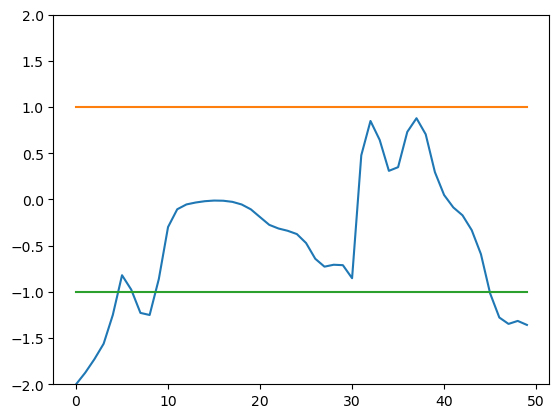

CLASS :  1.0
36053684.311359555


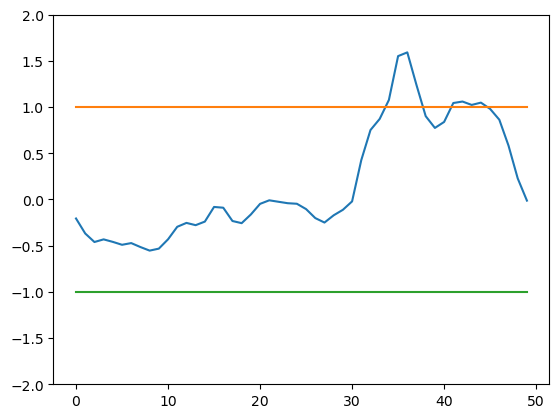

CLASS :  1.0
-2.3954786375083424e+16


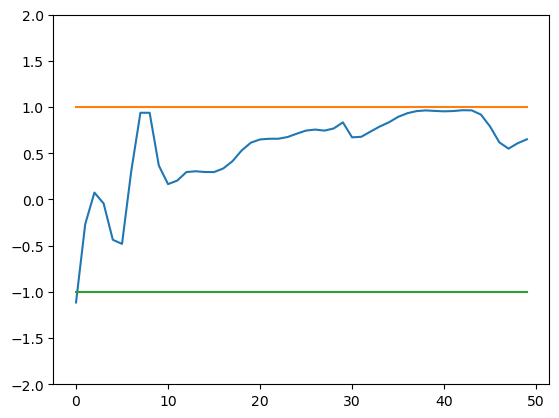

In [ ]:
for ti in range(n0, n0+10):
    plot_mu_for_tau_index(ti)

## Test GP Fourier on oublie le côté time series

In [ ]:
# %pip install george

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import george
from george import kernels
george.__version__

'0.4.2'

In [ ]:
kernel = SIGMAf2 * kernels.ExpSquaredKernel(metric= LAMBDAf2, ndim = d)

In [ ]:
X_data,Y_data
X_data.shape

(5000, 2000)

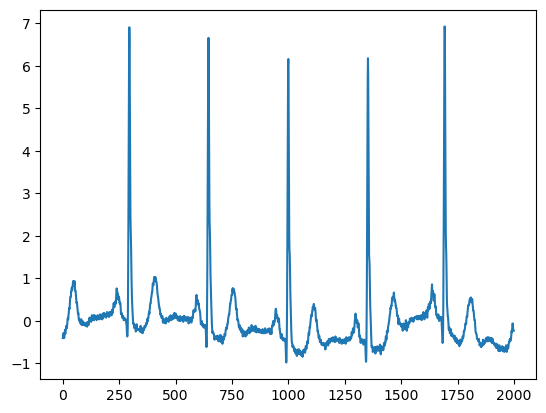

In [ ]:
plt.plot(X_data[0])

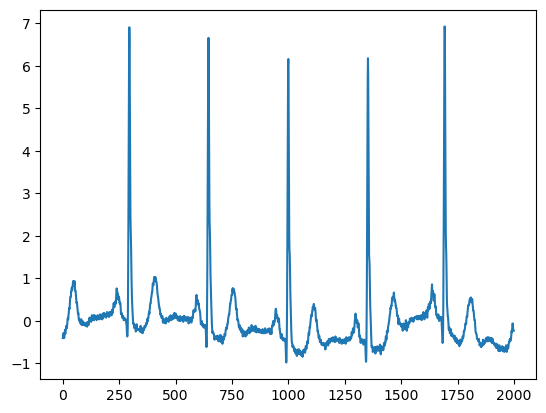

In [ ]:
fX_data = np.fft.fft(X_data,axis=-1)
fX_data.shape
ffX_data = np.fft.ifft(fX_data,axis=-1)
plt.plot(ffX_data[0].real);

In [ ]:
np.sum(np.abs(X_data-ffX_data))

2.858445414431999e-09

In [ ]:
Ntrain = 4000

In [ ]:
fX_train = fX_data[:N]
fX_test = fX_data[N:]

Y_train = Y_data[:N]
Y_test = Y_data[N:]

In [ ]:
fX_data.max()

(4885.492380021+0j)

In [ ]:
kernel = SIGMAf2 * kernels.ExpSquaredKernel(metric= 1e6, ndim = X_data.shape[1])

In [ ]:
gp = george.GP(kernel)
gp.compute(fX_train)
n_x = fX_test[0:10]
y_pred, y_pred_var = gp.predict(Y_train,n_x,return_var=True)
print(y_pred)
print(y_pred_var)


[-0.86319799 -0.72694238 -0.90602156  0.53284985 -0.04565911 -0.60804052
 -0.90828629 -1.04425591 -0.46066528  0.19717603]
[0.43243739 0.09391942 0.35743504 0.57418765 0.7762441  0.36967912
 0.59823601 0.10851723 0.82538272 0.61358916]


In [ ]:
gp.get_matrix(fX_train)

array([[1.        , 0.25713689, 0.16842129, ..., 0.20414352, 0.25346838,
        0.18487702],
       [0.25713689, 1.        , 0.35256222, ..., 0.25476449, 0.39469211,
        0.27904381],
       [0.16842129, 0.35256222, 1.        , ..., 0.17764492, 0.32026001,
        0.19345524],
       ...,
       [0.20414352, 0.25476449, 0.17764492, ..., 1.        , 0.32103179,
        0.11758212],
       [0.25346838, 0.39469211, 0.32026001, ..., 0.32103179, 1.        ,
        0.23589936],
       [0.18487702, 0.27904381, 0.19345524, ..., 0.11758212, 0.23589936,
        1.        ]])

In [ ]:
Y_test[0:10]

array([-1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.])

## George : marche pas pour l'instant j'ai pas encore compris George

In [ ]:
kernel = SIGMAf2 * kernels.ExpSquaredKernel(metric= LAMBDAf2, ndim = d)

In [ ]:
gp = george.GP(kernel)
gp.compute(Xn_.reshape(n0*m,d))
new_x = X[n0+10]
y_pred,y_pred_var = gp.predict(Yn_,new_x,return_var=True)
print(y_pred)
print(y_pred_var)

[ 6.02297041e-02  1.80122719e-01  1.66884703e-01  2.65495038e-01
  9.50424008e-02  1.22967727e-02 -1.08911713e-01  8.99941221e-03
  2.75522542e-01 -1.24879988e-01  1.90580567e-02 -2.85207120e-02
 -1.58375966e-04 -7.33743538e-03 -4.66976163e-03  9.28972452e-04
  4.30295238e-03  7.42819791e-03  2.05589475e-02  2.82730641e-02
  2.94886524e-03 -1.65850580e-02 -2.29746342e-02 -1.48571888e-02
 -2.09033204e-02 -7.35560625e-02 -1.26156415e-01 -1.62708204e-01
 -1.80742166e-01 -1.62190618e-01 -1.79781624e-01 -7.03798052e-02
  1.11542572e-01  4.03178912e-01  6.70422896e-01  6.63989685e-01
  6.63573151e-01  6.33031231e-01  6.38876898e-01  3.72787751e-01
  6.54508849e-02 -9.50091916e-02 -1.74107112e-02  4.83160220e-02
 -9.46056810e-03 -5.71554898e-02  2.92655841e-02 -6.42900514e-03
  8.73429890e-02  2.30902363e-02]
[0.00130402 0.00290535 0.00448584 0.00599111 0.00844853 0.01058002
 0.01121977 0.04499785 0.17719279 0.28835151 0.29353857 0.27107131
 0.32865244 0.42353377 0.50657494 0.53824791 0.55613

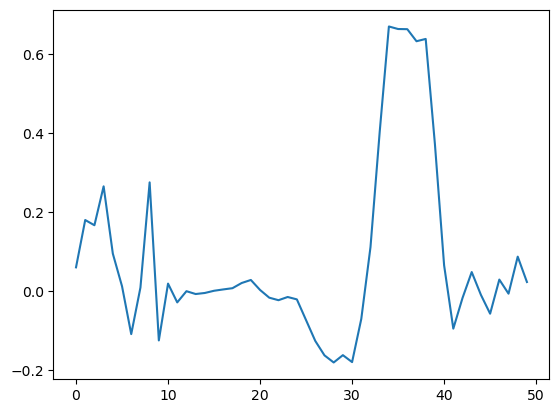

In [ ]:
plt.plot(y_pred)

In [ ]:
# Define the kernel with different length scales for each dimension
metric = 1.0 # Length scales for each dimension
kernel = kernels.ExpSquaredKernel(metric=metric, ndim = 2)

# Create a Gaussian Process model
gp = george.GP(kernel)

# Generate some sample 2D data
x = np.random.rand(50, 2) * 10  # 50 points in 2D space
y = np.sin(x[:, 0]) + np.cos(x[:, 1]) + 0.5 * np.random.randn(50)

# Train the GP model
gp.compute(x)

# Make predictions
x_pred = np.random.rand(100, 2) * 10
y_pred, y_pred_var = gp.predict(y, x_pred, return_var=True)

# Print the predictions
print(y_pred)
print(y_pred_var)


[-1.87918906e+00 -3.26901570e+00  2.50658903e+00 -1.24268661e+00
 -4.81083303e-01  1.18770289e+00  3.38143858e+00  3.59962969e-01
 -4.28145330e-01  2.15499328e+00  1.12105182e+00  1.40025315e+00
 -6.56788812e-02 -5.91630822e-01 -1.81679392e-01  1.01707032e+00
  5.96873844e-03 -3.55828515e-01  4.95923254e-01  8.80429432e-01
 -2.47939941e-01  8.93352431e-01  3.32810530e-01  1.20028473e-01
 -4.61897179e-01  7.49257371e-01 -2.41682080e+00 -6.81081696e-01
 -4.58866930e-01 -6.42440726e+00 -3.19471265e+00  2.52041289e-01
  9.26672871e-01  1.00794785e-01  8.03508932e-01 -3.91284559e-01
 -1.88716367e-02 -4.04879091e+00 -4.73730767e+00 -6.77624954e-01
 -8.56385830e-01  6.51232985e-02 -1.26252457e+00 -2.53767128e+00
  8.82087925e-01  1.27224093e+00 -2.75473373e+00 -8.35061736e-01
 -2.28220613e+00  9.94624675e-01  2.45742064e+00  1.05799807e+00
 -3.30206515e-01 -1.77581340e+00 -8.15197592e-02  7.09070110e-01
 -8.08161140e-01 -2.27123655e+00 -3.21463241e+00  1.04042060e-01
 -4.87455317e-01 -2.61656